<a href="https://colab.research.google.com/github/lrfurst/Challenger1_Alura_One/blob/main/Challenger1_Alura_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
print("Instalando bibliotecas necessárias...")
!pip install -q pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

print("Bibliotecas importadas.")
print("\n--- Upload dos Arquivos CSV ---")
print("Por favor, selecione os arquivos 'loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv' do seu computador.")
uploaded = files.upload()
print("\n--- Carregando e Validando Arquivos ---")
nomes_arquivos = ['loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv']
dataframes_individuais = {}
try:
  for i, nome_arq in enumerate(nomes_arquivos):
    nome_loja_df = f"df_loja_{i+1}"
    if nome_arq in uploaded:
        print(f"Carregando {nome_arq}...")
        df = pd.read_csv(io.BytesIO(uploaded[nome_arq]))
        dataframes_individuais[nome_loja_df] = df
        print(f"Primeiras linhas de {nome_arq}:\n", df.head())
        print("-" * 30)
    else:
        raise FileNotFoundError(f"Arquivo '{nome_arq}' não encontrado nos arquivos carregados.")
  print("\nCélula 1: Carregamento e validação inicial concluídos com sucesso!")
except FileNotFoundError as e:
  print(f"Erro: {e}. Verifique os nomes dos arquivos carregados e tente novamente.")
except pd.errors.EmptyDataError:
  print("Erro: Um ou mais arquivos CSV estão vazios. Verifique os arquivos.")
except pd.errors.ParserError:
  print("Erro: Falha ao analisar um ou mais arquivos CSV. Verifique a formatação.")
except Exception as e:
    print(f"Ocorreu um erro inesperado no carregamento: {e}")
if 'dataframes_individuais' in locals() and len(dataframes_individuais) == 4:
    df_loja_1 = dataframes_individuais['df_loja_1']
    df_loja_2 = dataframes_individuais['df_loja_2']
    df_loja_3 = dataframes_individuais['df_loja_3']
    df_loja_4 = dataframes_individuais['df_loja_4']
    print("Dataframes individuais (df_loja_1 a df_loja_4) estão prontos para a próxima célula.")
else:
    print("\nAtenção: Nem todos os dataframes individuais foram carregados corretamente.")


Instalando bibliotecas necessárias...
Bibliotecas importadas.

--- Upload dos Arquivos CSV ---
Por favor, selecione os arquivos 'loja_1.csv', 'loja_2.csv', 'loja_3.csv', 'loja_4.csv' do seu computador.


Saving loja_1.csv to loja_1.csv
Saving loja_2.csv to loja_2.csv
Saving loja_3.csv to loja_3.csv
Saving loja_4.csv to loja_4.csv

--- Carregando e Validando Arquivos ---
Carregando loja_1.csv...
Primeiras linhas de loja_1.csv:
                  Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                  

In [16]:
df1 = df_loja_1.copy()
df1['Nome da Loja'] = 'loja_1'
df2 = df_loja_2.copy()
df2['Nome da Loja'] = 'loja_2'
df3 = df_loja_3.copy()
df3['Nome da Loja'] = 'loja_3'
df4 = df_loja_4.copy()
df4['Nome da Loja'] = 'loja_4'
print("Coluna 'Nome da Loja' adicionada a cada DataFrame.")
df_final = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("DataFrames concatenados em 'df_final'.")
print("\nPrimeiras linhas do DataFrame final ('df_final'):\n", df_final.head())
print("\nÚltimas linhas do DataFrame final ('df_final'):\n", df_final.tail())
print("\nDimensões do DataFrame final (linhas, colunas):", df_final.shape)
print("Lojas presentes no DataFrame final:", df_final['Nome da Loja'].unique())
try:
    df_final.to_csv('lojas_unificadas.csv', index=False)
    print("\nCélula 2: DataFrame final salvo como 'lojas_unificadas.csv'")
except Exception as e:
    print(f"\nAtenção: Falha ao salvar o arquivo 'lojas_unificadas.csv'. Erro: {e}")


Coluna 'Nome da Loja' adicionada a cada DataFrame.
DataFrames concatenados em 'df_final'.

Primeiras linhas do DataFrame final ('df_final'):
                  Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Ti

In [17]:
import pandas as pd

df = pd.read_csv('lojas_unificadas.csv')
faturamento = df.groupby('Nome da Loja')['Preço'].sum()
print("\nFaturamento por loja:\n", faturamento)
categorias_mais_vendidas = df.groupby(['Nome da Loja', 'Categoria do Produto'])['Produto'].count().reset_index(name='Quantidade Vendida').sort_values(['Nome da Loja', 'Quantidade Vendida'], ascending=False).groupby('Nome da Loja').head(1)
print("\nCategorias mais vendidas por loja:\n", categorias_mais_vendidas)
avaliacao_media = df.groupby('Nome da Loja')['Avaliação da compra'].mean()
print("\nAvaliação média por loja:\n", avaliacao_media)
produtos_mais_vendidos = df.groupby(['Nome da Loja', 'Produto'])['Produto'].count().reset_index(name='Quantidade Vendida').sort_values(['Nome da Loja', 'Quantidade Vendida'], ascending=False).groupby('Nome da Loja').head(1)
print("\nProdutos mais vendidos por loja:\n", produtos_mais_vendidos)
frete_medio = df.groupby('Nome da Loja')['Frete'].mean()
print("\nFrete médio por loja:\n", frete_medio)



Faturamento por loja:
 Nome da Loja
loja_1    1534509.12
loja_2    1488459.06
loja_3    1464025.03
loja_4    1384497.58
Name: Preço, dtype: float64

Categorias mais vendidas por loja:
    Nome da Loja Categoria do Produto  Quantidade Vendida
30       loja_4               moveis                 480
22       loja_3               moveis                 499
14       loja_2               moveis                 442
6        loja_1               moveis                 465

Avaliação média por loja:
 Nome da Loja
loja_1    3.976685
loja_2    4.037304
loja_3    4.048326
loja_4    3.995759
Name: Avaliação da compra, dtype: float64

Produtos mais vendidos por loja:
     Nome da Loja                   Produto  Quantidade Vendida
161       loja_4                  Cama box                  62
134       loja_3             Kit banquetas                  57
79        loja_2  Iniciando em programação                  65
24        loja_1             Guarda roupas                  60

Frete médio por loj

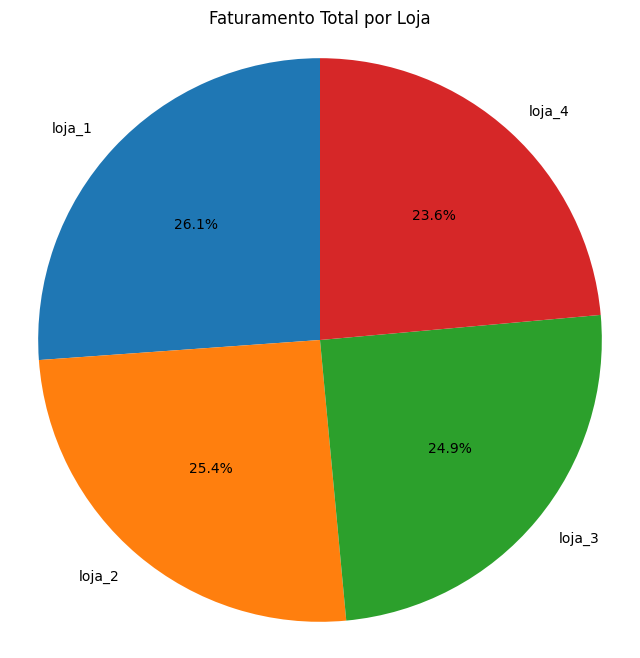

In [18]:
plt.figure(figsize=(8, 8))  # Define o tamanho da figura
plt.pie(faturamento, labels=faturamento.index, autopct='%1.1f%%', startangle=90)
plt.title('Faturamento Total por Loja')
plt.axis('equal')  # Define proporções iguais para o gráfico de pizza
plt.show()



Avaliação média por loja:
 Nome da Loja
loja_1    3.976685
loja_2    4.037304
loja_3    4.048326
loja_4    3.995759
Name: Avaliação da compra, dtype: float64


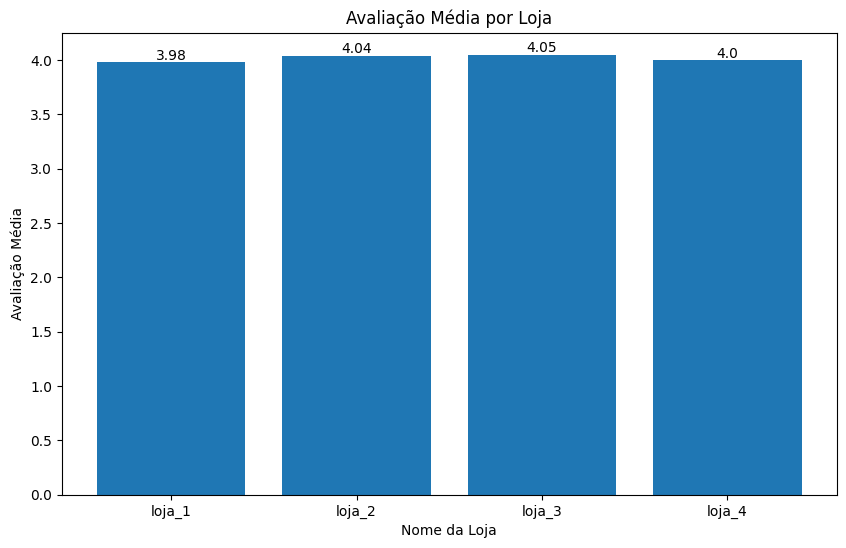

In [19]:
import matplotlib.pyplot as plt

avaliacao_media = df.groupby('Nome da Loja')['Avaliação da compra'].mean()
print("\nAvaliação média por loja:\n", avaliacao_media)
plt.figure(figsize=(10, 6))
bars = plt.bar(avaliacao_media.index, avaliacao_media.values)
plt.xlabel("Nome da Loja")
plt.ylabel("Avaliação Média")
plt.title("Avaliação Média por Loja")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()



Produtos mais vendidos por loja:
     Nome da Loja                   Produto  Quantidade Vendida
161       loja_4                  Cama box                  62
134       loja_3             Kit banquetas                  57
79        loja_2  Iniciando em programação                  65
24        loja_1             Guarda roupas                  60


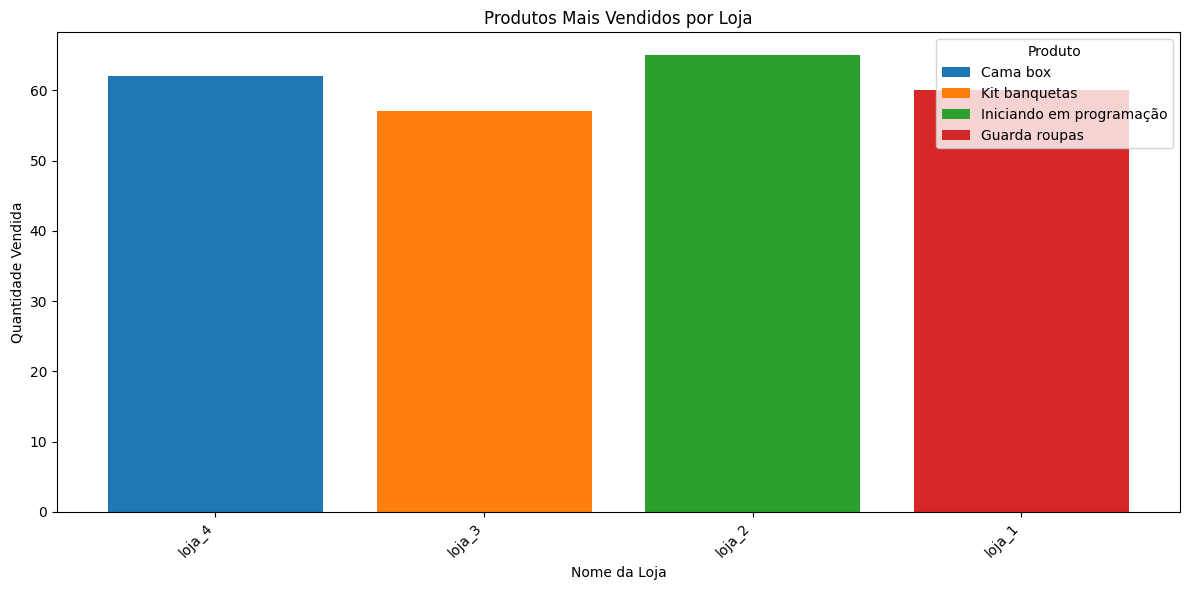

In [20]:
import matplotlib.pyplot as plt

produtos_mais_vendidos = df.groupby(['Nome da Loja', 'Produto'])['Produto'].count().reset_index(name='Quantidade Vendida').sort_values(['Nome da Loja', 'Quantidade Vendida'], ascending=False).groupby('Nome da Loja').head(1)
print("\nProdutos mais vendidos por loja:\n", produtos_mais_vendidos)
plt.figure(figsize=(12, 6))
for loja in produtos_mais_vendidos['Nome da Loja'].unique():
    loja_data = produtos_mais_vendidos[produtos_mais_vendidos['Nome da Loja'] == loja]
    plt.bar(loja_data['Nome da Loja'], loja_data['Quantidade Vendida'], label=loja_data['Produto'].iloc[0])
plt.xlabel("Nome da Loja")
plt.ylabel("Quantidade Vendida")
plt.title("Produtos Mais Vendidos por Loja")
plt.legend(title='Produto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


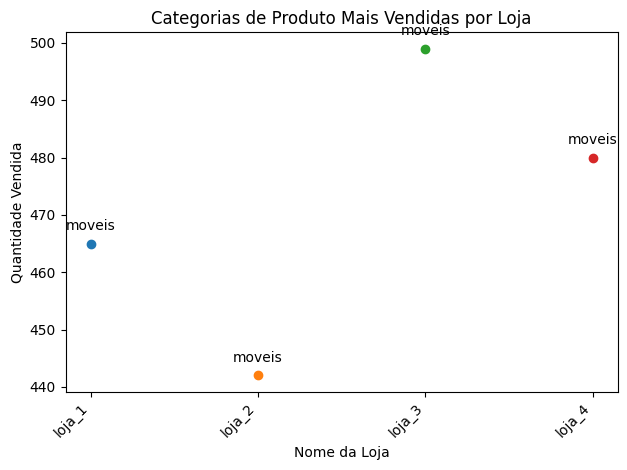

In [21]:
for loja in df_final['Nome da Loja'].unique():
    loja_data = df_final[df_final['Nome da Loja'] == loja]
    categorias_por_loja = loja_data.groupby('Categoria do Produto')['Produto'].count().reset_index(name='Quantidade Vendida')
    categoria_mais_vendida = categorias_por_loja.loc[categorias_por_loja['Quantidade Vendida'].idxmax()]
    plt.scatter(loja, categoria_mais_vendida['Quantidade Vendida'], label=categoria_mais_vendida['Categoria do Produto'])
    plt.annotate(categoria_mais_vendida['Categoria do Produto'], (loja, categoria_mais_vendida['Quantidade Vendida']), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel("Nome da Loja")
plt.ylabel("Quantidade Vendida")
plt.title("Categorias de Produto Mais Vendidas por Loja")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Frete médio por loja:
 Nome da Loja
loja_1    34.691805
loja_2    33.621941
loja_3    33.074464
loja_4    31.278997
Name: Frete, dtype: float64


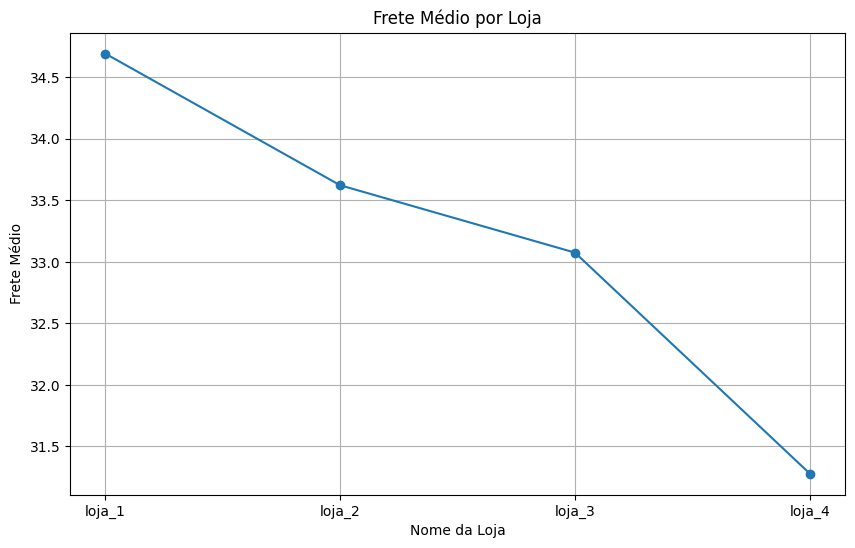

In [22]:
frete_medio = df.groupby('Nome da Loja')['Frete'].mean()
print("\nFrete médio por loja:\n", frete_medio)
plt.figure(figsize=(10, 6))
plt.plot(frete_medio.index, frete_medio.values, marker='o')
plt.xlabel("Nome da Loja")
plt.ylabel("Frete Médio")
plt.title("Frete Médio por Loja")
plt.grid(True)
plt.show()


In [23]:
maior_faturamento = faturamento.idxmax()
menor_faturamento = faturamento.idxmin()
print(f"\nLoja com maior faturamento: {maior_faturamento}")
print(f"Loja com menor faturamento: {menor_faturamento}")
quantidade_vendida = df.groupby('Nome da Loja')['Produto'].count()
maior_quantidade_vendida = quantidade_vendida.idxmax()
menor_quantidade_vendida = quantidade_vendida.idxmin()
print(f"\nLoja com maior quantidade de itens vendidos: {maior_quantidade_vendida}")
print(f"Loja com menor quantidade de itens vendidos: {menor_quantidade_vendida}")
maior_avaliacao = avaliacao_media.idxmax()
menor_avaliacao = avaliacao_media.idxmin()
print(f"\nLoja com maior avaliação: {maior_avaliacao}")
print(f"Loja com menor avaliação: {menor_avaliacao}")
maior_frete_medio = frete_medio.idxmax()
menor_frete_medio = frete_medio.idxmin()
print(f"\nLoja com maior frete médio: {maior_frete_medio}")
print(f"Loja com menor frete médio: {menor_frete_medio}")
print("\nProduto mais e menos vendido por loja:")
for loja in df['Nome da Loja'].unique():
    produtos_loja = df[df['Nome da Loja'] == loja]
    produto_mais_vendido_loja = produtos_loja.groupby('Produto')['Produto'].count().idxmax()
    produto_menos_vendido_loja = produtos_loja.groupby('Produto')['Produto'].count().idxmin()
    print(f"Loja {loja}: Mais vendido - {produto_mais_vendido_loja}, Menos vendido - {produto_menos_vendido_loja}")
produto_mais_vendido_geral = df.groupby('Produto')['Produto'].count().idxmax()
produto_menos_vendido_geral = df.groupby('Produto')['Produto'].count().idxmin()
print(f"\nProduto mais vendido (geral): {produto_mais_vendido_geral}")
print(f"Produto menos vendido (geral): {produto_menos_vendido_geral}")



Loja com maior faturamento: loja_1
Loja com menor faturamento: loja_4

Loja com maior quantidade de itens vendidos: loja_1
Loja com menor quantidade de itens vendidos: loja_4

Loja com maior avaliação: loja_3
Loja com menor avaliação: loja_1

Loja com maior frete médio: loja_1
Loja com menor frete médio: loja_4

Produto mais e menos vendido por loja:
Loja loja_1: Mais vendido - Guarda roupas, Menos vendido - Celular ABXY
Loja loja_2: Mais vendido - Iniciando em programação, Menos vendido - Jogo de tabuleiro
Loja loja_3: Mais vendido - Kit banquetas, Menos vendido - Blocos de montar
Loja loja_4: Mais vendido - Cama box, Menos vendido - Guitarra

Produto mais vendido (geral): Cômoda
Produto menos vendido (geral): Celular ABXY


In [37]:
print("Assunto: Recomendação de Venda de Loja - Rede Alura Store\n")
print("Prezado Senhor João,\n")
print("Após analisar os dados de desempenho das quatro lojas da sua rede Alura Store, considerando faturamento, volume de vendas, avaliação dos clientes e custo de frete, apresento a seguinte recomendação:\n")
print("A loja mais indicada para venda, visando liberar recursos para seu novo empreendimento, é a Loja 4.\n")
print("Justificativa:\n")
print("A decisão baseia-se nos seguintes pontos-chave extraídos diretamente da análise:\n")
print("Menor Desempenho em Vendas: A Loja 4 apresentou consistentemente os piores resultados nos indicadores mais cruciais de negócio:\n")
print("- Menor Faturamento: Registrou o menor faturamento entre as quatro lojas, indicando uma menor capacidade de gerar receita.\n")
print("- Menor Quantidade de Itens Vendidos: Também vendeu a menor quantidade de produtos, sugerindo menor volume de transações e possivelmente menor fluxo de clientes ou menor conversão de vendas.\n")
print("Desempenho Geral Comparativo:\n")
print("Embora a Loja 4 tenha a vantagem de possuir o menor frete médio, o que é positivo para a competitividade, isso não parece ser suficiente para compensar o baixo volume de vendas e faturamento.\n")
print("Sua avaliação média não foi a pior (a Loja 1 teve a menor avaliação), indicando que o problema principal não parece ser a satisfação do cliente, mas sim a atração ou conversão de vendas.\n")
print("Conclusão:\n")
print("Considerando que o objetivo é vender a loja menos eficiente para investir em um novo projeto, a Loja 4 é a escolha mais lógica. Seu baixo desempenho nos indicadores fundamentais de faturamento e volume de vendas a posiciona como a unidade que menos contribui para o resultado geral da rede e, portanto, cujo desinvestimento teria, comparativamente, o menor impacto negativo nas operações atuais, ao mesmo tempo que libera capital.\n")
print("Esperamos que esta análise, fundamentada nos dados apresentados, auxilie em sua decisão estratégica.")


Assunto: Recomendação de Venda de Loja - Rede Alura Store

Prezado Senhor João,

Após analisar os dados de desempenho das quatro lojas da sua rede Alura Store, considerando faturamento, volume de vendas, avaliação dos clientes e custo de frete, apresento a seguinte recomendação:

A loja mais indicada para venda, visando liberar recursos para seu novo empreendimento, é a Loja 4.

Justificativa:

A decisão baseia-se nos seguintes pontos-chave extraídos diretamente da análise:

Menor Desempenho em Vendas: A Loja 4 apresentou consistentemente os piores resultados nos indicadores mais cruciais de negócio:

- Menor Faturamento: Registrou o menor faturamento entre as quatro lojas, indicando uma menor capacidade de gerar receita.

- Menor Quantidade de Itens Vendidos: Também vendeu a menor quantidade de produtos, sugerindo menor volume de transações e possivelmente menor fluxo de clientes ou menor conversão de vendas.

Desempenho Geral Comparativo:

Embora a Loja 4 tenha a vantagem de possuir 